### Steps Of Kmeans Clustering
- Step 1 : Decice the number of clusters
- Step 2 : Select the random centroids
- Step 3 : Assign data points to nearest centroids(Forming Cluster)
- Step 4 : Move centroids as per new clusters
- Step 5 : Check if old centroids and new centroids are same to stop process.

In [143]:
import random
import numpy as np

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        # select random row from train dataset
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        # select values of random row as centroid
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break
        return cluster_group,self.centroids

    def assign_clusters(self,X):
        cluster_group = []
        distances = []
        for row in X:
            for centroid in self.centroids:
                # calculate ecludian distance
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            # find index of min distance
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            # add index as cluster number into cluster_group
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []
        # find unique cluster types
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            #calculate mean of data of particular type
            new_centroids.append(X[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

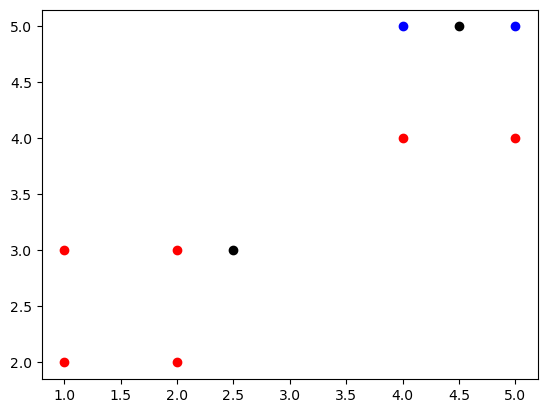

In [148]:
# For 1 Iteration
import numpy as np
import random
import matplotlib.pyplot as plt

X=np.array([[1,2],[1,3],[2,3],[2,2],[4,4],[4,5],[5,4],[5,5]])
km= KMeans(n_clusters=2,max_iter=1)
y_means,centroids = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(centroids[0][0],centroids[0][1],color="black")
plt.scatter(centroids[1][0],centroids[1][1],color="black")
plt.show()

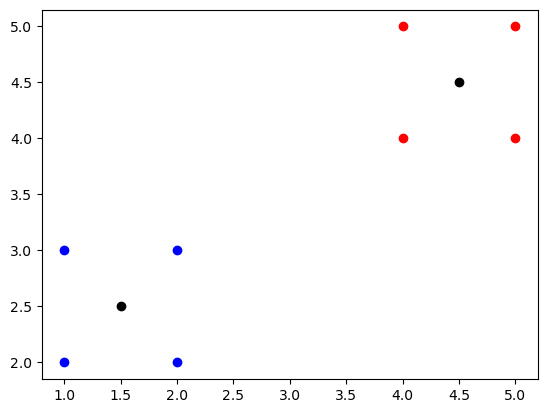

In [151]:
# For more Iteration
import numpy as np
import random
import matplotlib.pyplot as plt

X=np.array([[1,2],[1,3],[2,3],[2,2],[4,4],[4,5],[5,4],[5,5]])
km= KMeans(n_clusters=2,max_iter=10)

y_means,centroids = km.fit_predict(X)

plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='blue')
plt.scatter(centroids[0][0],centroids[0][1],color="black")
plt.scatter(centroids[1][0],centroids[1][1],color="black")
plt.show()